   ID  Year_Birth   Education Marital_Status     Income  Kidhome  Teenhome  \
0   1        1978      Master         Single  491796.22        1         0   
1   2        1974      Master        Married  513926.78        1         0   
2   3        1972  Graduation          Alone  521309.22        2         2   
3   4        1911         PhD           YOLO  231628.91        1         0   
4   5        1931    2n Cycle       Divorced  223936.10        1         1   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2013-12-26       31      1364  ...                 14             1   
1  2014-05-04       23      1275  ...                  5             1   
2  2013-02-15       93        62  ...                  1             1   
3  2013-06-12       13       251  ...                 14             0   
4  2013-05-30       65       670  ...                 13             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             1

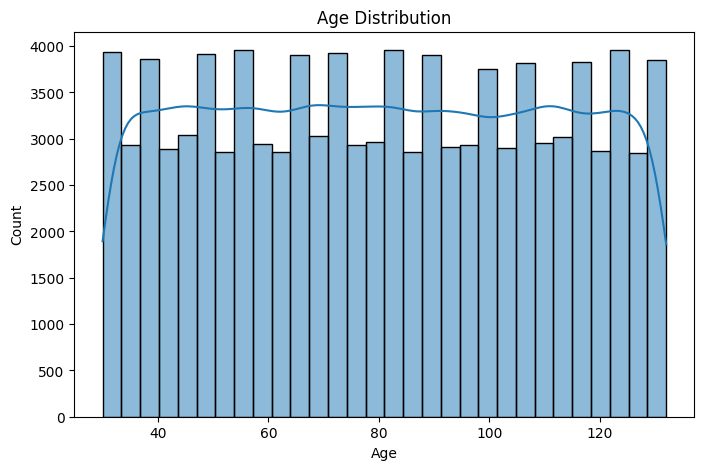

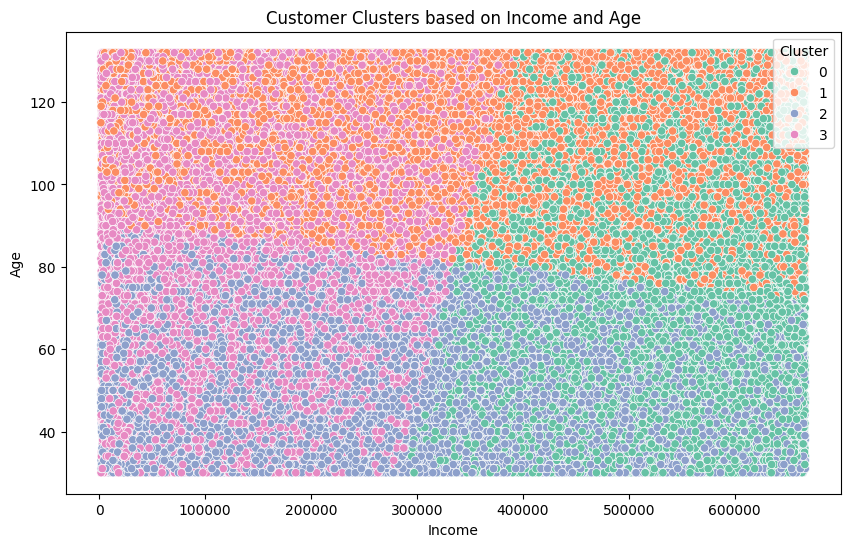

In [2]:
# Step 1: Import necessary libraries
import pandas as pd  # For handling data in tables (DataFrames)
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For advanced visualizations

# Step 2: Load the dataset
data = pd.read_csv('Marketing_Campaign_Dataset.csv')

# Step 3: Explore the dataset
# View the first 5 rows of the data to understand its structure
print(data.head())

# Step 4: Check for missing values and data types
print(data.info())
print(data.isnull().sum())

# Step 5: Data cleaning and feature engineering
# Convert 'Dt_Customer' to a date format
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

# Create a new column 'Age' from 'Year_Birth'
data['Age'] = 2025 - data['Year_Birth']

# Step 6: Visualize some basic insights
# Plot age distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Step 7: Select relevant features for clustering
features = data[['Income', 'Age', 'Recency']]

# Step 8: Handle missing values in selected features
features = features.dropna()

# Step 9: Standardize the data for clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 10: Apply K-Means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_features)

# Step 11: Add cluster labels to the original data
data['Cluster'] = kmeans.labels_

# Step 12: Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Age', hue='Cluster', data=data, palette='Set2')
plt.title('Customer Clusters based on Income and Age')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()



✅ Dataset Loaded Successfully!

🔎 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100279 entries, 0 to 100278
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   100279 non-null  int64  
 1   Year_Birth           100279 non-null  int64  
 2   Education            100279 non-null  object 
 3   Marital_Status       100279 non-null  object 
 4   Income               100279 non-null  float64
 5   Kidhome              100279 non-null  int64  
 6   Teenhome             100279 non-null  int64  
 7   Dt_Customer          100279 non-null  object 
 8   Recency              100279 non-null  int64  
 9   MntWines             100279 non-null  int64  
 10  MntFruits            100279 non-null  int64  
 11  MntMeatProducts      100279 non-null  int64  
 12  MntFishProducts      100279 non-null  int64  
 13  MntSweetProducts     100279 non-null  int64  
 14  MntGoldProds         1

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_8572\2715894628.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)



✅ PCA completed! Reduced to 24 components.


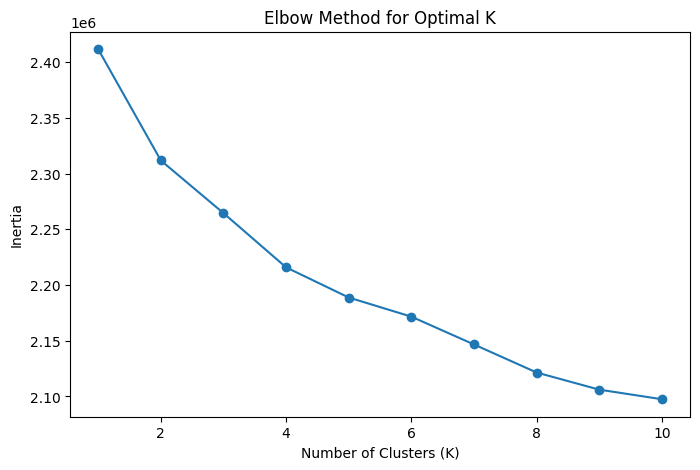

MemoryError: Unable to allocate 37.5 GiB for an array with shape (5027888781,) and data type float64

In [1]:
# 📊 Marketing Campaign Analysis - Customer Segmentation Project
# ✅ Simple, college-level implementation with step-by-step explanations

# ----------------------
# Step 1: Import Libraries
# ----------------------
# Libraries for data handling, preprocessing, clustering, and visualization
import pandas as pd  # For handling data in table format
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For better-looking graphs
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For data preprocessing
from sklearn.decomposition import PCA  # For dimensionality reduction
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering  # Clustering methods
from scipy.cluster.hierarchy import dendrogram, linkage  # For hierarchical clustering visualization

# ----------------------
# Step 2: Load the Dataset
# ----------------------
# Replace with your dataset path if different
file_path = 'Marketing_Campaign_Dataset.csv'  # Make sure this file is in your working directory
df = pd.read_csv(file_path)
print("\n✅ Dataset Loaded Successfully!")

# ----------------------
# Step 3: Data Exploration & Cleaning
# ----------------------
print("\n🔎 Data Info:")
print(df.info())

# Check for missing values
print("\n❓ Missing Values:")
print(df.isnull().sum())

# Fill missing Income values with the median (simplest approach)
df['Income'].fillna(df['Income'].median(), inplace=True)

# ----------------------
# Step 4: Feature Engineering
# ----------------------
from datetime import datetime  # To calculate customer tenure

# Create new features
df['Customer_Age'] = 2025 - df['Year_Birth']
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Customer_Tenure'] = (datetime(2025, 2, 25) - df['Dt_Customer']).dt.days

# Encode categorical variables (Education & Marital_Status)
label_enc = LabelEncoder()
df['Education'] = label_enc.fit_transform(df['Education'])
df['Marital_Status'] = label_enc.fit_transform(df['Marital_Status'])

# Drop irrelevant columns
df.drop(columns=['ID', 'Year_Birth', 'Dt_Customer'], inplace=True)

# ----------------------
# Step 5: Data Preprocessing
# ----------------------
# Scale the features to bring all values between a standard range
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# ----------------------
# Step 6: Dimensionality Reduction (PCA)
# ----------------------
pca = PCA(n_components=0.90)  # Keep 90% variance
pca_features = pca.fit_transform(scaled_features)
print(f"\n✅ PCA completed! Reduced to {pca.n_components_} components.")

# ----------------------
# Step 7: Clustering
# ----------------------
## 7.1 K-Means Clustering
inertia = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(pca_features)
    inertia.append(model.inertia_)

# Plot Elbow Method to find optimal K
plt.figure(figsize=(8,5))
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Apply K-Means with K=5 (chosen from elbow plot)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(pca_features)

## 7.2 Hierarchical Clustering
linked = linkage(pca_features, method='ward')
plt.figure(figsize=(10,7))
dendrogram(linked)
plt.title('Dendrogram - Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

hierarchical = AgglomerativeClustering(n_clusters=5)
clusters_hierarchical = hierarchical.fit_predict(pca_features)

## 7.3 DBSCAN Clustering
dbscan = DBSCAN(eps=2, min_samples=5)
clusters_dbscan = dbscan.fit_predict(pca_features)

# ----------------------
# Step 8: Cluster Visualization (K-Means Example)
# ----------------------
plt.figure(figsize=(8,6))
plt.scatter(pca_features[:,0], pca_features[:,1], c=clusters_kmeans, cmap='rainbow')
plt.title('K-Means Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# ----------------------
# Step 9: Deployment with Streamlit
# ----------------------
# Create a simple Streamlit app to visualize the clusters
# Save this code in a separate file named 'app.py' and run using: streamlit run app.py

"""
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

st.title("📊 Customer Segmentation Dashboard")

# Upload CSV file
uploaded_file = st.file_uploader("Upload your dataset")

if uploaded_file:
    df = pd.read_csv(uploaded_file)
    st.write("✅ Data Preview:", df.head())

    st.write("### K-Means Clustering Visualization")
    fig, ax = plt.subplots()
    ax.scatter(pca_features[:,0], pca_features[:,1], c=clusters_kmeans, cmap='coolwarm')
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    st.pyplot(fig)
"""

print("\n🚀 Project Completed! Use the Streamlit code to explore clusters interactively.")
